<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

# Part-I (EDA)

<h2>Importing Necessary Libraries </h2>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import re
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial as f
from pylab import rcParams
rcParams['figure.figsize'] = 10, 15
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy import stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind

In [ ]:
df=pd.read_csv('marketing_data.csv')

In [ ]:
df.head(n=5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df.tail(n=5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [ ]:
df.shape

(2240, 28)

- The dataset contains 2240 rows and 28 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
 Income                2216 non-null object
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 n

In [ ]:
print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)

percentage of missing data of dataframe 
 ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
 Income                1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Response               0.000000
Complain               0.000000
Country                0.000000
dtype: float64


- We can see none of the column has missing values except Income column.
- As it is only 1% we will drop all the missing values column.

In [ ]:
df.dropna(inplace=True)

In [ ]:
print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)

percentage of missing data of dataframe 
 ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
 Income                0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Response               0.0
Complain               0.0
Country                0.0
dtype: float64


<h3> Coverting Income column </h3>

In [ ]:
df.columns = df.columns.str.replace(' ', '') 

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
def map_income(x):
    try:
        x = x.strip('$')
        x = re.sub(',','',x)
        return float(x)
    except:
        return np.nan

In [ ]:
df['Income'] = df['Income'].map(map_income)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

# Part-II (Hypothesis Testing)

<h2>Chi-Square Test </h2>


Our Assumption for Hypothesis Testing

**H0**= The Martial_Status and Education are independent

**H1**= The Martial_Status and Education are dependent

In [ ]:
alpha=0.05
martial_chi_2,martial_p_val,martial_deg_free,martial_freq_count=stats.chi2_contingency(pd.crosstab(df['Marital_Status'],df['Education']))
print("Chi square value : ",martial_chi_2)
print("*"*20)
print("P value : ",martial_p_val)
print("*"*20)
print("Degree of freedom : ",martial_deg_free)
print("*"*20)
print("Expected Frequency Count matrix : ",martial_freq_count)
print("*"*20)
if martial_p_val <= alpha:
    print(f'Since the p-value, {round(martial_p_val, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(martial_p_val,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Chi square value :  26.776521697414516
********************
P value :  0.5304403824967148
********************
Degree of freedom :  28
********************
Expected Frequency Count matrix :  [[1.80505415e-01 4.87364621e-02 1.00722022e+00 3.29422383e-01
  4.34115523e-01]
 [2.70758123e-01 7.31046931e-02 1.51083032e+00 4.94133574e-01
  6.51173285e-01]
 [2.09386282e+01 5.65342960e+00 1.16837545e+02 3.82129964e+01
  5.03574007e+01]
 [7.73465704e+01 2.08835740e+01 4.31593863e+02 1.41157491e+02
  1.86018502e+02]
 [4.25090253e+01 1.14774368e+01 2.37200361e+02 7.75789711e+01
  1.02234206e+02]
 [5.17148014e+01 1.39629964e+01 2.88568592e+02 9.43795126e+01
  1.24374097e+02]
 [6.85920578e+00 1.85198556e+00 3.82743682e+01 1.25180505e+01
  1.64963899e+01]
 [1.80505415e-01 4.87364621e-02 1.00722022e+00 3.29422383e-01
  4.34115523e-01]]
********************
	 Since the p-value, 0.53 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


<h2>Z-test </h2>

Is there any significant difference in the income of the customers who are graduates and the customers who PhD holders? 
    
Null hypothesis (Ho) : There is no difference between the two means

Alternate hypothesis (Ha) : There is significant difference between the two means

In [ ]:
sample1 = df.loc[df.Education == 'Graduation', 'Income']
sample2 = df.loc[df.Education =='PhD', 'Income']

alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Since the p-value, 0.016 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


<h2>ANOVA </h2>

Null Hypothesis(Ho): Average Income by All educations  are the same

Alternative Hypothesis(Ha): Average Income  by all educations  are  different

In [ ]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
graduates=df.loc[df.Education == 'Graduation', 'Income']
phd=df.loc[df.Education == 'PhD', 'Income']
master=df.loc[df.Education == 'Master', 'Income']
cycle=df.loc[df.Education == '2n Cycle', 'Income']
basic=df.loc[df.Education == 'Basic', 'Income']

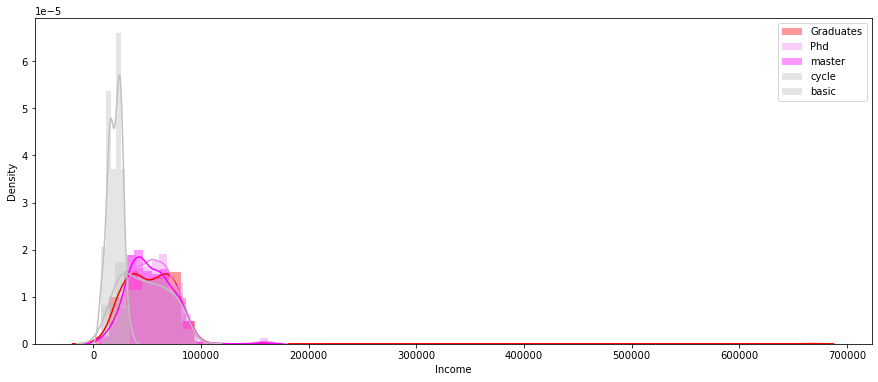

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(graduates, color = 'Red', label = 'Graduates')
sns.distplot(phd, color = 'violet', label = 'Phd')
sns.distplot(master, color = 'magenta', label = 'master')
sns.distplot(cycle, color = 'silver', label = 'cycle')
sns.distplot(basic, color = 'silver', label = 'basic')
plt.legend()
plt.show()

In [ ]:
stat, p_value = f_oneway(graduates,phd,master,cycle,basic)
alpha = 0.05
print(p_value)
print("*"*20)
if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

1.6677281316366318e-22
********************
Since the p-value, 0.0 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


<h1>Marital Status Vs Income </h1>

In [ ]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [ ]:
sample1 = df.loc[df.Marital_Status == 'Married', 'Income']
sample2 = df.loc[df.Marital_Status =='Single', 'Income']

alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.558 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


In [ ]:
married=df.loc[df.Marital_Status == 'Married', 'Income']
single=df.loc[df.Marital_Status == 'Single', 'Income']
together=df.loc[df.Marital_Status == 'Together', 'Income']
divorced=df.loc[df.Marital_Status == 'Divorced', 'Income']
widow=df.loc[df.Marital_Status == 'Widow', 'Income']

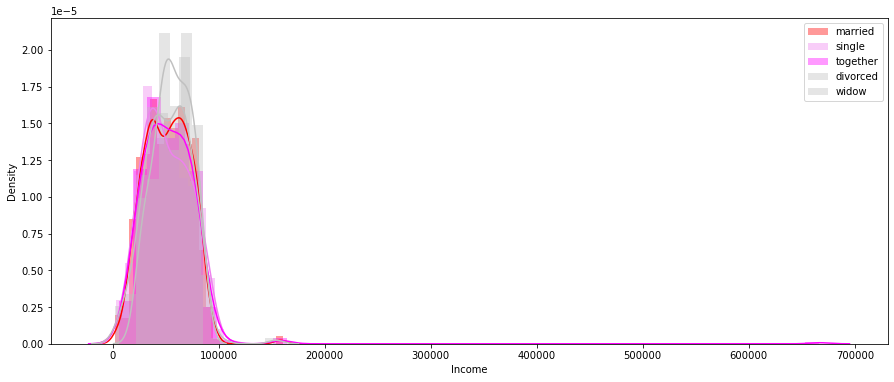

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(married, color = 'Red', label = 'married')
sns.distplot(single, color = 'violet', label = 'single')
sns.distplot(together, color = 'magenta', label = 'together')
sns.distplot(divorced, color = 'silver', label = 'divorced')
sns.distplot(widow, color = 'silver', label = 'widow')
plt.legend()
plt.show()

In [ ]:
stat, p_value = f_oneway(married,single,together,divorced,widow)
alpha = 0.05
print(p_value)
print("*"*20)
if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

0.3194326333294853
********************
	 Since the p-value, 0.319 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


<h3>END </h3>

# Additional Exhaustive EDA (Optional) 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


<AxesSubplot:xlabel='Income', ylabel='Density'>

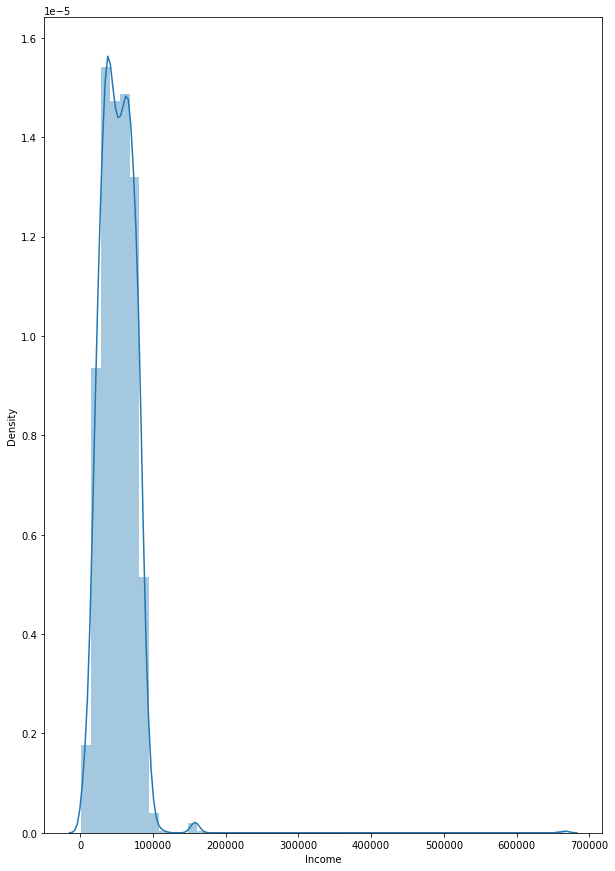

In [ ]:
sns.distplot(df['Income'])

- Most of the Income is ranging from 0-100,000.
- Seems like some extream values are present as we can see a small peaked curve around 700000,but outliers are very less.

<AxesSubplot:xlabel='Income'>

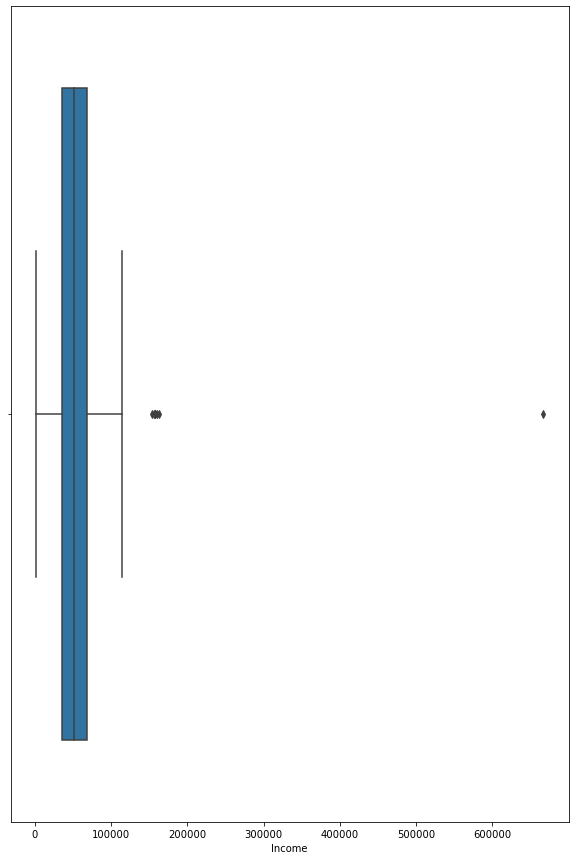

In [ ]:
sns.boxplot(df['Income'])

- Yes, We are correct from the distribution plot. Outliers are very less but extreme values are present.

<h3>Plotting of the Distribution of Education Data </h2> 

            Education  Frequency_Percentage
Graduation       1116                 93.00
PhD               481                 40.08
Master            365                 30.42
2n Cycle          200                 16.67
Basic              54                  4.50


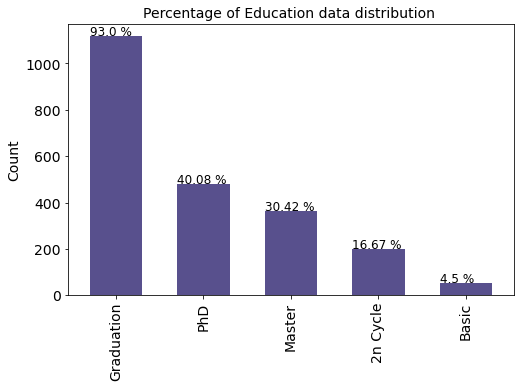

In [ ]:
def percentage_education(df):
    df=df.copy()
    ed_data=pd.DataFrame(df['Education'].value_counts())
    ed_data['Frequency_Percentage']=[round(i/12,2) for i in ed_data['Education']]
    print(ed_data)
    ax = df['Education'].value_counts().plot(kind='bar', figsize=(8, 5),color=['#58508d'],fontsize=14, width=0.6)
    ax.set_title('Percentage of Education data distribution ',fontsize=14)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()*100/1200,2))+' %', (p.get_x() * 1.0005, p.get_height() * 1.005),fontsize=12)
    ax.set_ylabel('Count',fontsize=14)
    

percentage_education(df)
    
    

- Most of the customers are graduate.

     Country  Frequency_Percentage
SP      1093                 91.08
SA       337                 28.08
CA       266                 22.17
AUS      147                 12.25
IND      147                 12.25
GER      116                  9.67
US       107                  8.92
ME         3                  0.25


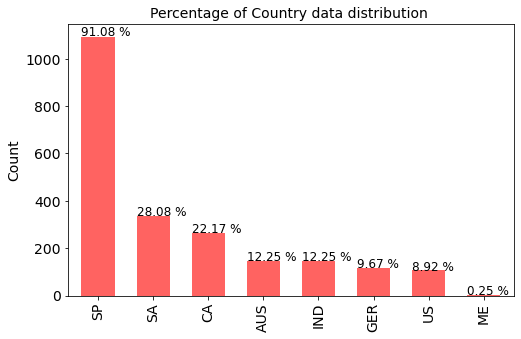

In [ ]:
def percentage_country(df):
    df=df.copy()
    cu_data=pd.DataFrame(df['Country'].value_counts())
    cu_data['Frequency_Percentage']=[round(i/12,2) for i in cu_data['Country']]
    print(cu_data)
    ax = df['Country'].value_counts().plot(kind='bar', figsize=(8, 5),color=['#ff6361'],fontsize=14, width=0.6)

    ax.set_title('Percentage of Country data distribution ',fontsize=14)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()*100/1200,2))+' %', (p.get_x() * 1.0005, p.get_height() * 1.005),fontsize=12)
    ax.set_ylabel('Count',fontsize=14)
    
    
    
percentage_country(df)

- Most of the customers are from spain.

          Marital_Status  Frequency_Percentage
Married              857                 71.42
Together             573                 47.75
Single               471                 39.25
Divorced             232                 19.33
Widow                 76                  6.33
Alone                  3                  0.25
YOLO                   2                  0.17
Absurd                 2                  0.17


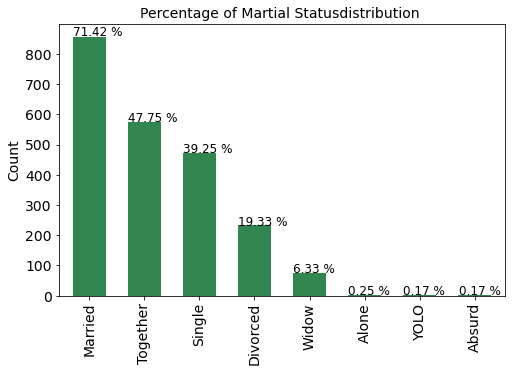

In [ ]:
def percentage_mrg(df):
    df=df.copy()
    mrg_data=pd.DataFrame(df['Marital_Status'].value_counts())
    mrg_data['Frequency_Percentage']=[round(i/12,2) for i in mrg_data['Marital_Status']]
    print(mrg_data)
    ax = df['Marital_Status'].value_counts().plot(kind='bar', figsize=(8, 5),color=['#31854f'],fontsize=14, width=0.6)

    ax.set_title('Percentage of Martial Statusdistribution ',fontsize=14)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()*100/1200,2))+' %', (p.get_x() * 1.0005, p.get_height() * 1.005),fontsize=12)
    ax.set_ylabel('Count',fontsize=14)
    
    

percentage_mrg(df)

- Most of the people are married.
- Together has the second highest.

<h2>Country wise Education </h2>

In [ ]:
country_crosstab=pd.crosstab(df['Education'],df['Country'], margins=True)
country_crosstab

Country,AUS,CA,GER,IND,ME,SA,SP,US,All
Education,,,,,,,,,
2n Cycle,8,24,19,20,0,25,97,7,200
Basic,4,7,2,4,0,6,28,3,54
Graduation,79,132,58,76,1,161,546,63,1116
Master,29,49,19,21,1,60,171,15,365
PhD,27,54,18,26,1,85,251,19,481
All,147,266,116,147,3,337,1093,107,2216


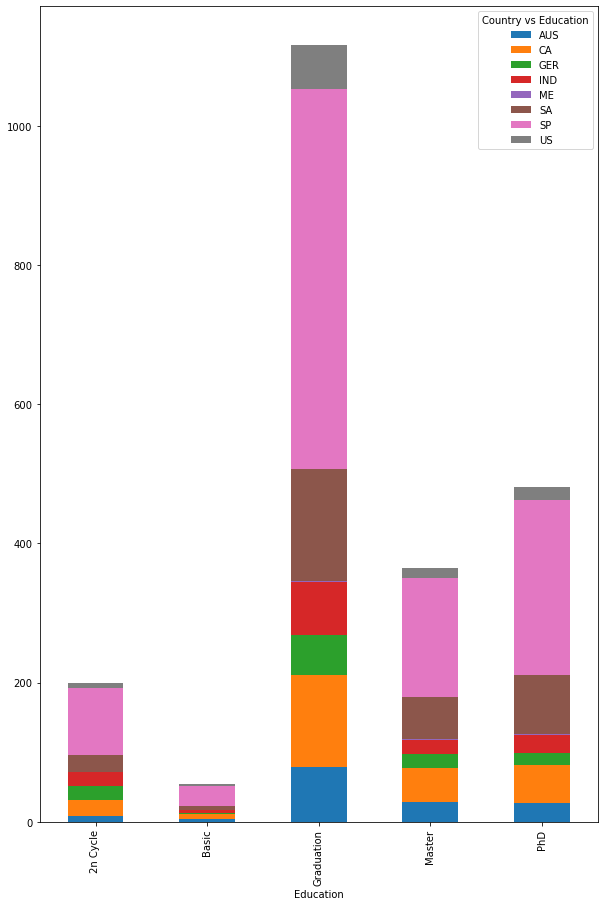

In [ ]:
pd.crosstab(df['Education'],df['Country']).plot.bar(stacked=True)
plt.legend(title='Country vs Education')
plt.show()

- Spain has the highest graduate label customers.

Country      AUS     CA   GER    IND    ME     SA     SP    US
Education                                                     
2n Cycle    4.00  12.00  9.50  10.00  0.00  12.50  48.50  3.50
Basic       7.41  12.96  3.70   7.41  0.00  11.11  51.85  5.56
Graduation  7.08  11.83  5.20   6.81  0.09  14.43  48.92  5.65
Master      7.95  13.42  5.21   5.75  0.27  16.44  46.85  4.11
PhD         5.61  11.23  3.74   5.41  0.21  17.67  52.18  3.95
**********************************************************************


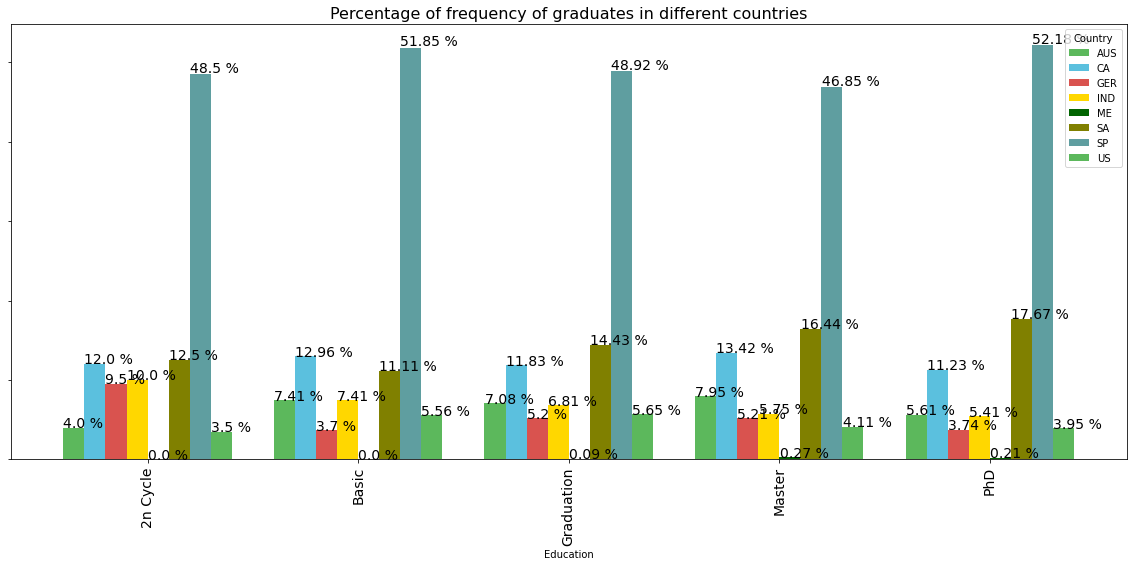

In [ ]:
def cross_country_edu_percentage(df):
    df=df.copy()
    country_crosstab_perc=pd.crosstab(df['Education'],df['Country']).apply(lambda r: round(r*100/r.sum(),2), axis=1)
    print(country_crosstab_perc)
    print("*"*70)
    ax = country_crosstab_perc.plot(kind='bar', figsize=(20, 8),color=['#5cb85c','#5bc0de','#d9534f','#FFD700','#006400','#808000','#5F9EA0'],fontsize=14, width=0.8)
    ax.set_title('Percentage of frequency of graduates in different countries',fontsize=16)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    for p in ax.patches:
        ax.annotate(str(p.get_height())+' %', (p.get_x() * 1.0005, p.get_height() * 1.005),fontsize=14)
    ax.tick_params(bottom="True", left="True")
    ax.set_yticklabels([])
    
    
    
cross_country_edu_percentage(df)

<h2>percentage segment Graph between Education and Country.

<AxesSubplot:xlabel='Education'>

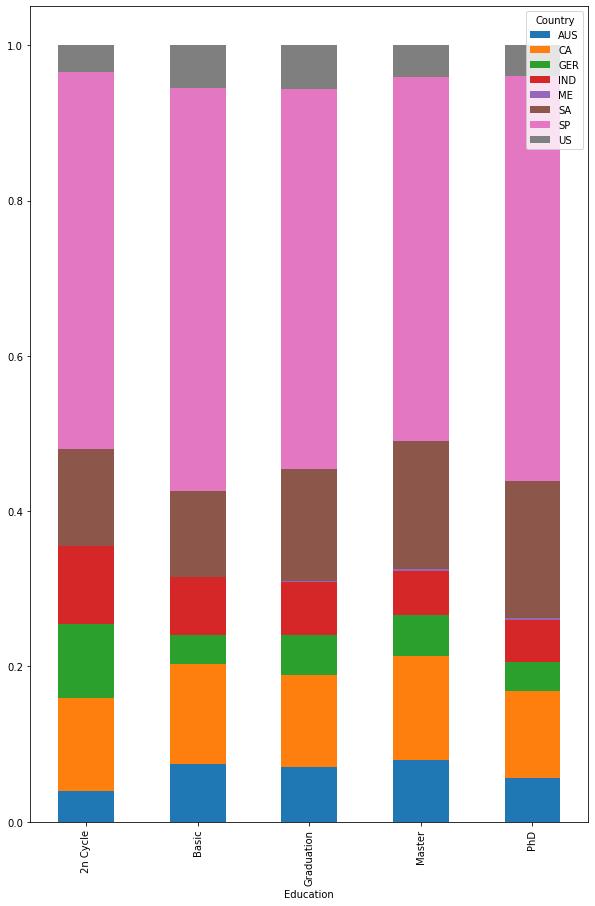

In [ ]:
props = df.groupby("Education")['Country'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')

<h2>Maritial Status and Education </h2>

In [ ]:
mar_crosstab=pd.crosstab(df['Marital_Status'],df['Education'], margins=True)
mar_crosstab

Education,2n Cycle,Basic,Graduation,Master,PhD,All
Marital_Status,,,,,,
Absurd,0,0,1,1,0,2
Alone,0,0,1,1,1,3
Divorced,23,1,119,37,52,232
Married,80,20,429,138,190,857
Single,36,18,246,75,96,471
Together,56,14,285,102,116,573
Widow,5,1,35,11,24,76
YOLO,0,0,0,0,2,2
All,200,54,1116,365,481,2216


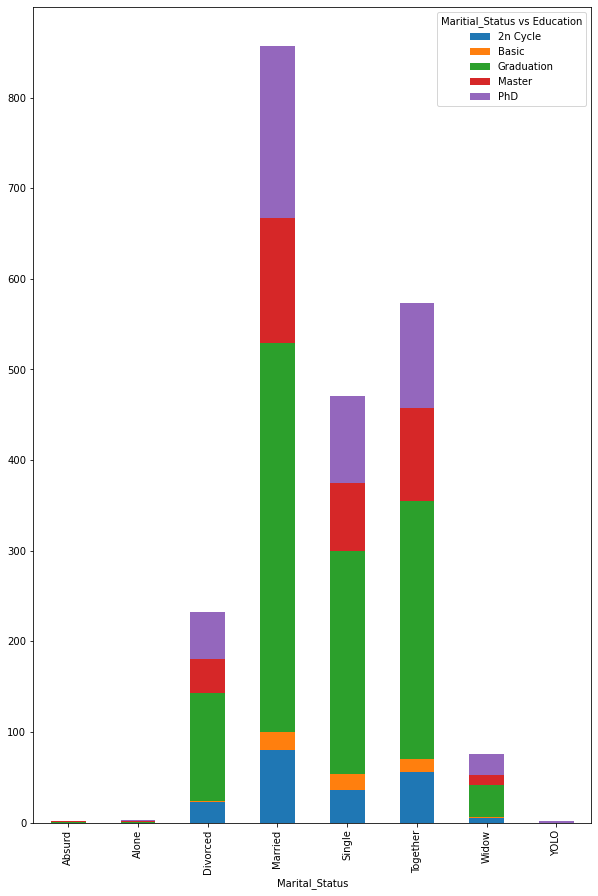

In [ ]:
pd.crosstab(df['Marital_Status'],df['Education']).plot.bar(stacked=True)
plt.legend(title='Maritial_Status vs Education')
plt.show()

Education       2n Cycle  Basic  Graduation  Master     PhD
Marital_Status                                             
Absurd              0.00   0.00       50.00   50.00    0.00
Alone               0.00   0.00       33.33   33.33   33.33
Divorced            9.91   0.43       51.29   15.95   22.41
Married             9.33   2.33       50.06   16.10   22.17
Single              7.64   3.82       52.23   15.92   20.38
Together            9.77   2.44       49.74   17.80   20.24
Widow               6.58   1.32       46.05   14.47   31.58
YOLO                0.00   0.00        0.00    0.00  100.00
**********************************************************************


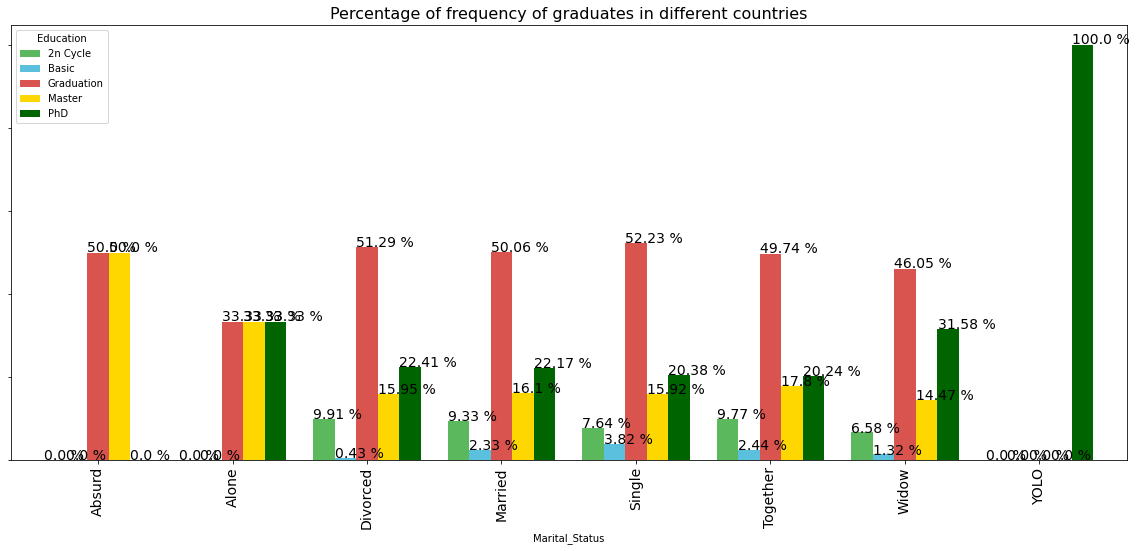

In [ ]:
def cross_mrg_edu_percentage(df):
    df=df.copy()
    mar_crosstab_perc=pd.crosstab(df['Marital_Status'],df['Education']).apply(lambda r: round(r*100/r.sum(),2), axis=1)
    print(mar_crosstab_perc)
    print("*"*70)
    ax = mar_crosstab_perc.plot(kind='bar', figsize=(20, 8),color=['#5cb85c','#5bc0de','#d9534f','#FFD700','#006400','#808000','#5F9EA0'],fontsize=14, width=0.8)

    ax.set_title('Percentage of frequency of graduates in different countries',fontsize=16)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    for p in ax.patches:
        ax.annotate(str(p.get_height())+' %', (p.get_x() * 1.0005, p.get_height() * 1.005),fontsize=14)
    ax.tick_params(bottom="True", left="True")
    ax.set_yticklabels([])
    

cross_mrg_edu_percentage(df)

- Singles have highest number of graduates (i.e.52.23 %).

<h2>Percentage Segmented Graph </h2>

<AxesSubplot:xlabel='Marital_Status'>

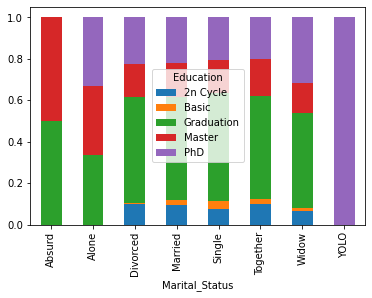

In [ ]:
props = df.groupby("Marital_Status")['Education'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')

<h1>Marital Status vs Country </h2>

In [ ]:
coun_mar_crosstab=pd.crosstab(df['Marital_Status'],df['Country'], margins=True)
coun_mar_crosstab

Country,AUS,CA,GER,IND,ME,SA,SP,US,All
Marital_Status,,,,,,,,,
Absurd,1,1,0,0,0,0,0,0,2
Alone,0,3,0,0,0,0,0,0,3
Divorced,20,27,6,10,0,47,106,16,232
Married,66,104,56,57,0,106,433,35,857
Single,18,58,18,37,2,70,237,31,471
Together,37,66,32,38,1,102,274,23,573
Widow,5,6,4,4,0,12,43,2,76
YOLO,0,1,0,1,0,0,0,0,2
All,147,266,116,147,3,337,1093,107,2216


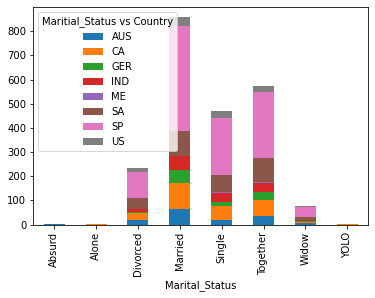

In [ ]:
pd.crosstab(df['Marital_Status'],df['Country']).plot.bar(stacked=True)
plt.legend(title='Maritial_Status vs Country')
plt.show()

Country           AUS      CA   GER    IND    ME     SA     SP    US
Marital_Status                                                      
Absurd          50.00   50.00  0.00   0.00  0.00   0.00   0.00  0.00
Alone            0.00  100.00  0.00   0.00  0.00   0.00   0.00  0.00
Divorced         8.62   11.64  2.59   4.31  0.00  20.26  45.69  6.90
Married          7.70   12.14  6.53   6.65  0.00  12.37  50.53  4.08
Single           3.82   12.31  3.82   7.86  0.42  14.86  50.32  6.58
Together         6.46   11.52  5.58   6.63  0.17  17.80  47.82  4.01
Widow            6.58    7.89  5.26   5.26  0.00  15.79  56.58  2.63
YOLO             0.00   50.00  0.00  50.00  0.00   0.00   0.00  0.00
**********************************************************************


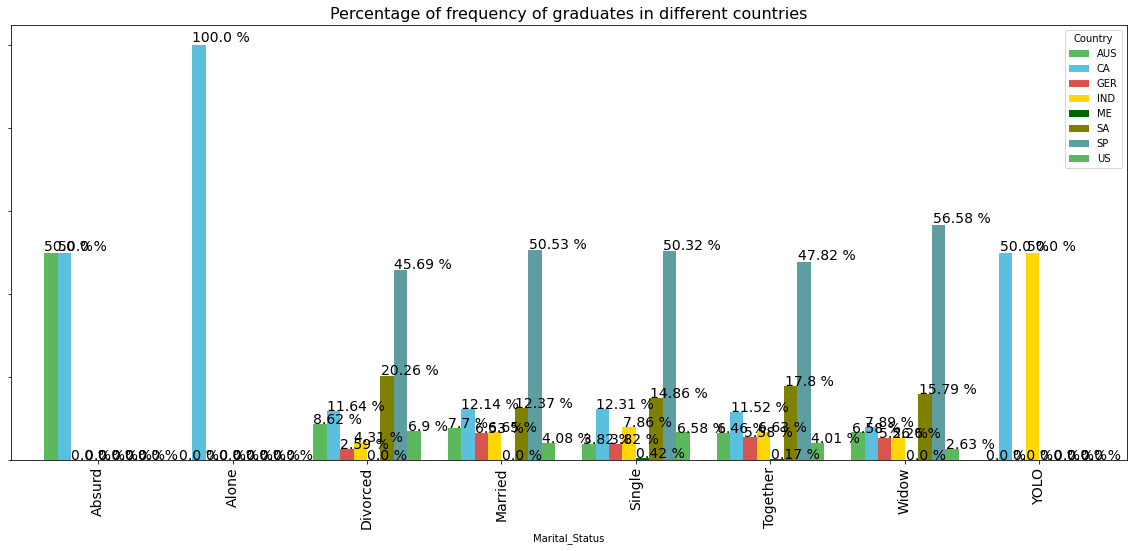

In [ ]:
def cross_mrg_country_percentage(df):
    df=df.copy()
    coun_mar_crosstab_perc=pd.crosstab(df['Marital_Status'],df['Country']).apply(lambda r: round(r*100/r.sum(),2), axis=1)
    print(coun_mar_crosstab_perc)
    print("*"*70)
    ax = coun_mar_crosstab_perc.plot(kind='bar', figsize=(20, 8),color=['#5cb85c','#5bc0de','#d9534f','#FFD700','#006400','#808000','#5F9EA0'],fontsize=14, width=0.8)

    ax.set_title('Percentage of frequency of graduates in different countries',fontsize=16)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    for p in ax.patches:
        ax.annotate(str(p.get_height())+' %', (p.get_x() * 1.0010, p.get_height() * 1.010),fontsize=14)
    ax.tick_params(bottom="True", left="True")
    ax.set_yticklabels([])
    
    
cross_mrg_country_percentage(df)

<h2>Percentage Segmented Graph </h2>

<AxesSubplot:xlabel='Marital_Status'>

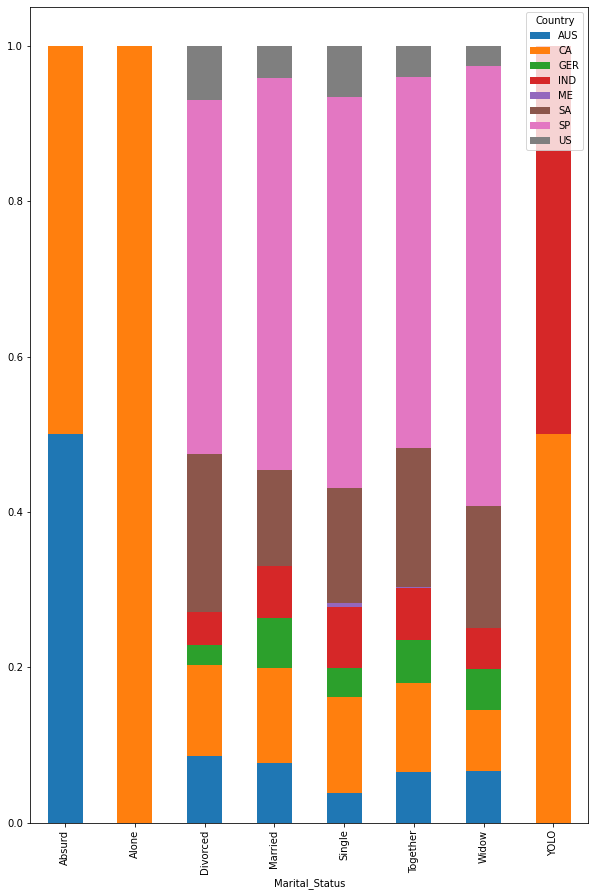

In [ ]:
props = df.groupby("Marital_Status")['Country'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')